In [2]:
import re
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.style.use('ggplot')

In [3]:
f=nc.Dataset('/data/jpetrie/MEOPAR/SalishSea/results/d9f69a38-160e-11e6-9b98-0025909a8461/SS5x5_1h_20041019_20041023_ptrc_T.nc')
fkeys=f.variables.keys()
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
z=f.variables[zkey][:]
t=f.variables['time_counter'][:]
tz,zt=np.meshgrid((t-t[0])/3600/24,-z[:])

/home/jpetrie/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


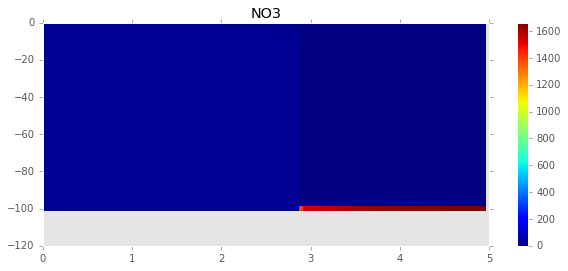

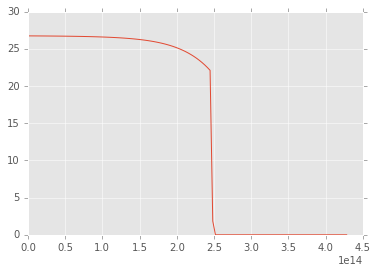

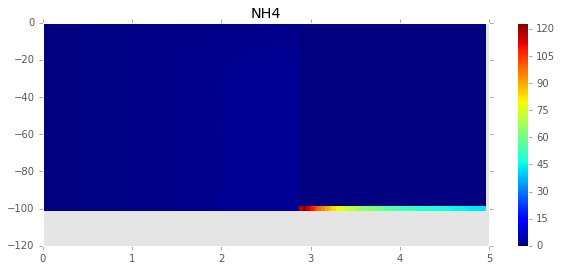

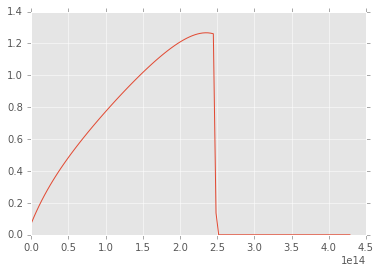

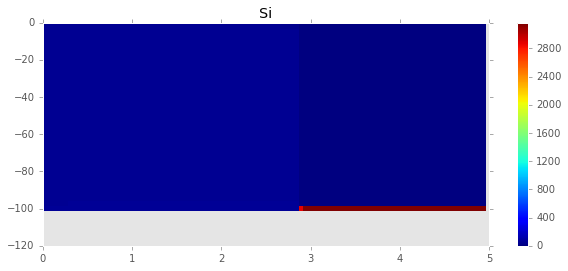

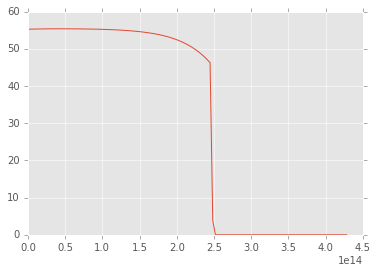

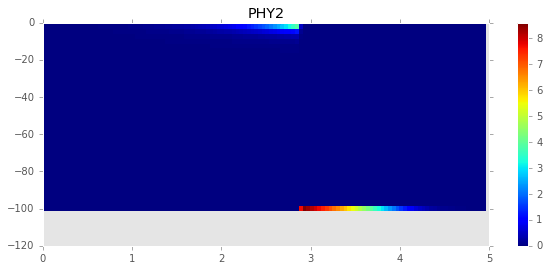

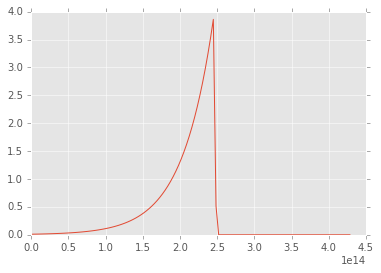

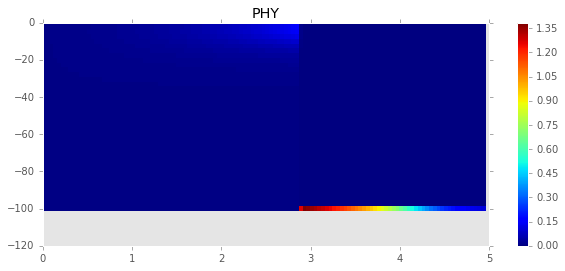

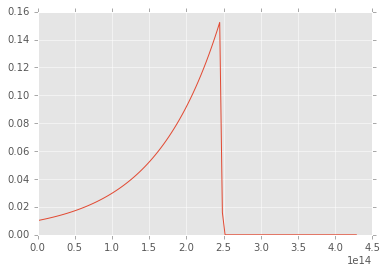

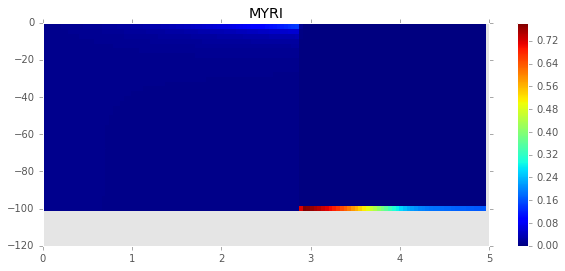

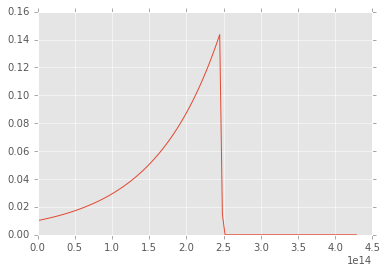

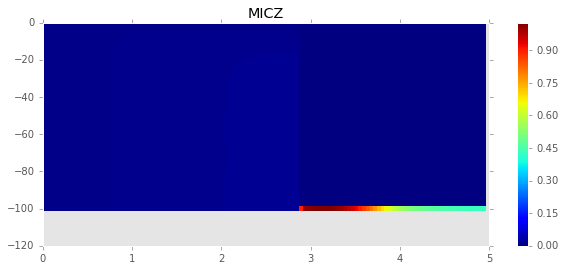

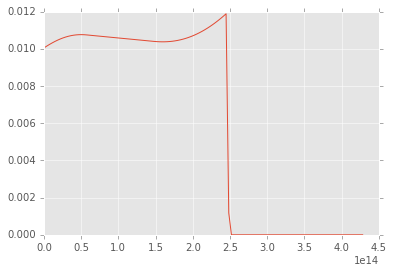

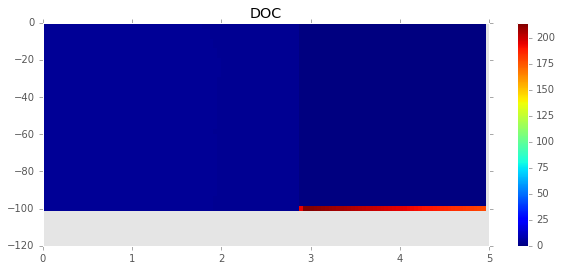

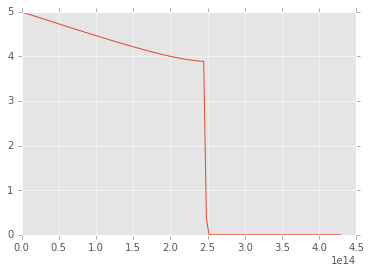

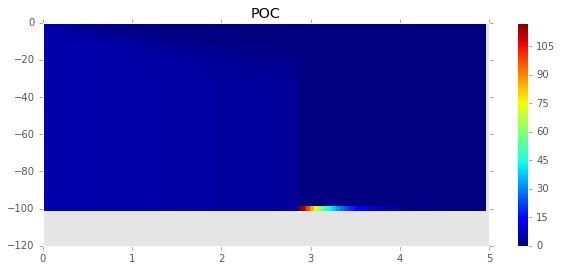

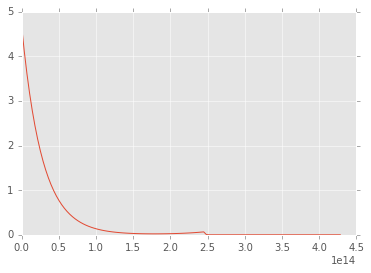

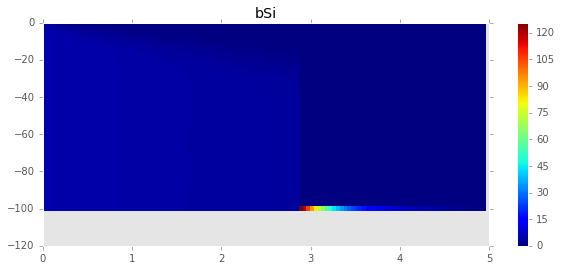

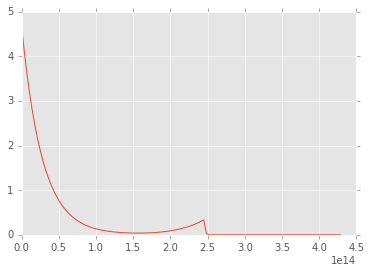

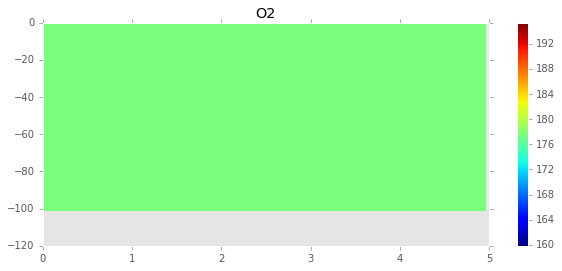

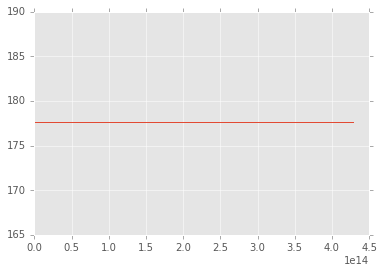

In [14]:
for ik in fkeys:
    if np.size(f.variables[ik].shape)==4:
        fig, axs = plt.subplots(1,1,figsize=(10,4))
        mesh=plt.pcolormesh(tz[:3600*24*1,:],zt[:3600*24*1,:],f.variables[ik][:3600*24*1,:,2,2].T)
        plt.colorbar()
        plt.title(ik)
        
        df = pd.DataFrame(f.variables[ik][:,0,2,2], index= pd.to_timedelta(t - min(t), "s"), columns = [ik])
        plt.figure()
        plt.plot(df.index, df[ik], '-')

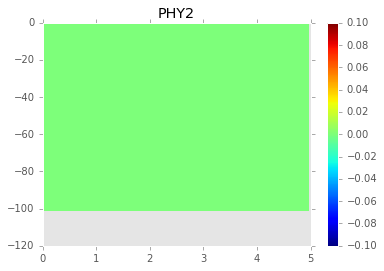

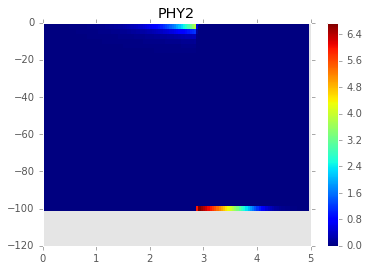

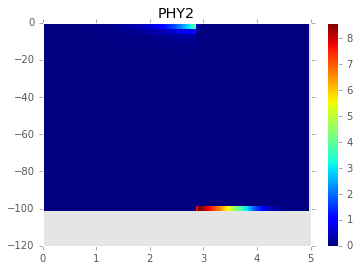

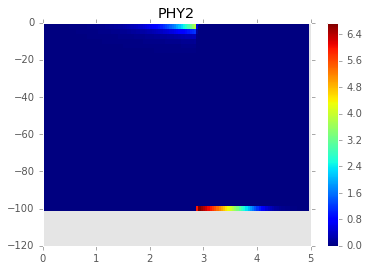

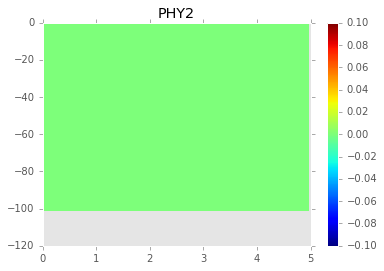

In [5]:
for n in range(5):
    ik = "PHY2"
    fig, axs = plt.subplots()
    mesh=plt.pcolormesh(tz[:3600*24*1,:],zt[:3600*24*1,:],f.variables[ik][:3600*24*1,:,n,2].T)
    plt.colorbar()
    plt.title(ik)

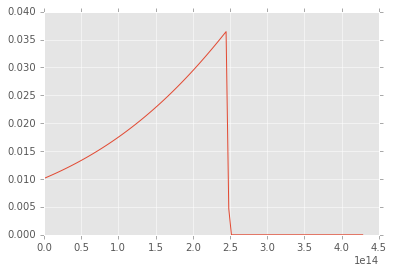

In [11]:
df = pd.DataFrame(f.variables[ik][:,5,2,2], index= pd.to_timedelta(t - min(t), "s"), columns = [ik])
plt.figure()
plt.plot(df.index, df.PHY2, '-')

In [ ]:
df